# 15 August

In [2]:
import numpy as np
from datascience import *
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

Number of seconds in month of June:

In [3]:
seconds_in_June = 30*24*60*60
seconds_in_June

2592000

Number of seconds elapsed between 1 June 1200 and 14 August 0930: 

In [4]:
seconds_elapsed = 74*24*60*60 + 12*60*60 + 9.5*60*60 # There's got to be an easier way to do this with other packages . . .
seconds_elapsed

6471000.0

World Populations:

In [5]:
population=Table.read_table('world_population.csv')
population

Population
2557628654
2594939877
2636772306
2682053389
2730228104
2782098943
2835299673
2891349717
2948137248
3000716593


In [6]:
# This line of code shows the world population in 2015:
population.item(-1)

Population
7256490011


In [7]:
# This line of code shows the difference between the population in 2015 (.item(-1), the last number in the table
# and the population in 1950 (item(0)), the first number in the table.
# the '.column()' method puts the data in population into an array which allows me to perform algebraic operations on it.
population.column('Population').item(-1) - population.column('Population').item(0)

4698861357

In [8]:
# Find the average annual growth rate over the entire data set:
initial_1950 = population.column('Population').item(0)
final_2015 = population.column('Population').item(-1)
time = 65
(final_2015/initial_1950) ** (1/time) - 1


0.01617270380658975

In [9]:
# So the average annual growth rate from 1950 to 2015 is approximately 1.6%.

Information on Titanic Passengers:

In [15]:
#4
Titanic_Passengers=Table.read_table('https://raw.githubusercontent.com/oikobill/Kaggle/master/Titanic/data/train.csv')
Titanic_Passengers
#This code imports data from a csv file (comma separated values) into this notebook in table format.

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,nan,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.925,nan,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1,C123,S
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.05,nan,S
6,0,3,"Moran, Mr. James",male,nan,0,0,330877,8.4583,nan,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.075,nan,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,nan,S
10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,nan,C


In [42]:
#a
Titantic_Passengers = Titanic_Passengers.relabeled('Pclass','passenger_class')
Titantic_Passengers
#This line of code replaces the column name 'Pclass' with a slightly more descriptive name 'passenger_class'

PassengerId,Survived,passenger_class,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,nan,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.925,nan,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1,C123,S
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.05,nan,S
6,0,3,"Moran, Mr. James",male,nan,0,0,330877,8.4583,nan,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.075,nan,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,nan,S
10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,nan,C


In [43]:
#b
total_fam = Titanic_Passengers.column('SibSp') + Titanic_Passengers.column('Parch')
Titanic_Passengers.with_column('family_size', total_fam)
#Creates an array made up of the sum of values in the SibSp and Parch columns then puts those values
#into a column called 'family_size' which shows the number of family members.

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_size
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,nan,S,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C,1
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.925,nan,S,0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1,C123,S,1
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.05,nan,S,0
6,0,3,"Moran, Mr. James",male,nan,0,0,330877,8.4583,nan,Q,0
7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S,0
8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.075,nan,S,4
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,nan,S,2
10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,nan,C,1


In [44]:
#b
#Why didn't the new 'passenger_class' name carry over into this cell output?
total_fam = Titanic_Passengers.column('SibSp') + Titanic_Passengers.column('Parch')
Titanic_Passengers = Titanic_Passengers.with_column('family_size', total_fam)
#Creates an array made up of the sum of values in the SibSp and Parch columns then puts those values
#into a column called 'family_size' which shows the number of family members.

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_size
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,nan,S,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C,1
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.925,nan,S,0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1,C123,S,1
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.05,nan,S,0
6,0,3,"Moran, Mr. James",male,nan,0,0,330877,8.4583,nan,Q,0
7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S,0
8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.075,nan,S,4
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,nan,S,2
10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,nan,C,1


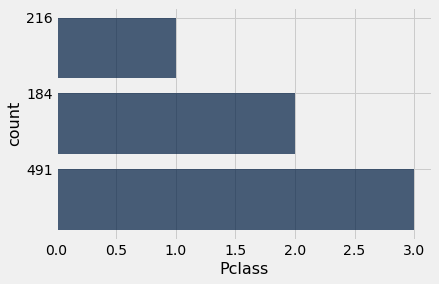

In [47]:
#c
#Create a barplot of passengers by passenger class.
Class_Count = Titanic_Passengers.group('Pclass') #This table method groups rows according to the values they share in the Pclass column.
Class_Count.barh('count') #This line creates a bar graph based on the number of passengers in each class using the table created above.

In [65]:
#d 
#Sort the data by age and show the 5 youngest passengers.
Titanic_Passengers.sort('Age') #sorts data by age in ascending order. Youngest five passengers should be first five rows
Titanic_Passengers.where('Age',are.between(0,0.92)).sort('Age')
#The second line of code makes a table of only the passengers between certain ages. There were two passengers at 0.83 years old
#so they're both included on this new table of values. I want to find a way for python to do this for me so that I can just 
#write code to create a table of the names of the new top 5 passengers in the table after sorting it by age rather than doing the
#math myself.
# 834,804,756,470,645,79 = row indices of youngest six passengers 

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
804,1,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,nan,C
756,1,2,"Hamalainen, Master. Viljo",male,0.67,1,1,250649,14.5,nan,S
470,1,3,"Baclini, Miss. Helene Barbara",female,0.75,2,1,2666,19.2583,nan,C
645,1,3,"Baclini, Miss. Eugenie",female,0.75,2,1,2666,19.2583,nan,C
79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29,nan,S
832,1,2,"Richards, Master. George Sibley",male,0.83,1,1,29106,18.75,nan,S


In [80]:
#e
#Sort passengers by descending age.
Titanic_Passengers.sort('Age',descending=True)
#The top 5 passengers displayed all have 'nan' recorded as their age. I'm not sure what this means . . .

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,nan,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.925,nan,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1,C123,S
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.05,nan,S
6,0,3,"Moran, Mr. James",male,nan,0,0,330877,8.4583,nan,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.075,nan,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,nan,S
10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,nan,C


In [ ]:
# I need to eliminate the rows containing 'nan' as the age value and then sort by descending age again, 
# but I can't figure out how to eliminate the rows I want to eliminate.

In [97]:
#f
#Find Passenger survival rate by class.
Survivors = Titanic_Passengers.where('Survived', are.equal_to(1))
Survivors.group('Pclass')

Pclass,count
1,136
2,87
3,119


In [105]:
s_rate_by_class = Survivors.group('Pclass').column('count')/Titanic_Passengers.group('Pclass').column('count')
Survivors.group('Pclass').with_column('Survival_Rate', s_rate_by_class)
#These rows divide the number of survivors per class by the number of passengers per class then add those rates to 
#the respective class in the 'Survivors' table. There's probably a cleaner way to do this too.
#Clearly a greater percentage of first class passengers survived. Is this
#because there were fewer of them or because they had quicker access to lifeboats?

Pclass,count,Survival_Rate
1,136,0.62963
2,87,0.472826
3,119,0.242363


In [106]:
#g
#How many passengers embarked from Queenstown?
Titanic_Passengers.where('Embarked',are.equal_to('Q')).num_rows

77

In [109]:
#How many children traveled without parents?
Children = Titanic_Passengers.where('Age',are.below(18))
Children.where('Parch',are.equal_to(0)).num_rows

32